A notebook for prototyping how we fit models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from janelia_core.stats.regression import visualize_coefficient_stats
from keller_zlatic_vnc.whole_brain.spontaneous import fit_init_models

a:\keller_drive\projects\janelia_core\janelia_core\fileio\exp_reader.py:21: UserWarning: Unable to locate pyklb module.  Will not be able to read in .klb files.
  warnings.warn('Unable to locate pyklb module.  Will not be able to read in .klb files.')


In [3]:
%matplotlib notebook

## Parameters go here

In [5]:
ps = dict()

# Folders containing a4 and a9 annotation data
ps['annot_folders'] = [ r'A:\projects\keller_vnc\data\full_annotations\em_volume_behavior_csv']

# File containing locations to registered volumes
ps['volume_loc_file'] = r'A:\projects\keller_vnc\data\EM_volume_experiment_data_locations.xlsx'

# List subjects we do not want to include in the analysis
ps['exclude_subjs'] = set(['CW_17-11-06-L2'])

# Subfolder containing the dataset for each subject
ps['dataset_folder'] = 'extracted'

# Base folder where datasets are stored
ps['dataset_base_folder'] = r'K:\\SV4'

# The defintion we use for clean events
ps['clean_event_def'] = 'po'  # 'dj' or 'po'

# Specify the threshold we use (in number of stacks) to determine when a quiet transition has occurred
ps['q_th'] = 21

# Specify the cut off threshold we use (in number of stacks) to determine when a real transition has occurred
ps['co_th'] = 6 #[3,6]

# Specify the number of frames to use for the duration of marked quiet events
ps['q_length'] = 3

# Specify the set of acceptable behaviors transitioned into for events we analyze
ps['behs'] = ['B', 'F', 'TL', 'TR', 'H']

# Specify the acceptable preceding behaviors for events we analyze
ps['pre_behs'] = ['Q', 'B', 'F', 'TL', 'TR', 'H']

# True if we want to pool preceding left and right turns into one category (only applies if pool_preceeding_behaviors
# is false)
ps['pool_preceeding_turns'] = False

# True if we want to pool succeeding left and right turns into one category
ps['pool_succeeding_turns'] = False

# True if we should remove events that transition from a behavior to that same behavior
ps['remove_st'] = False

# The preceding behavior we use for the reference condition
ps['pre_ref_beh'] = 'Q'

# Data to calculate Delta F/F for in each dataset
ps['f_ts_str'] = 'f_1_5_5'
ps['bl_ts_str'] = 'bl_1_5_5_long'

# Parameters for calculating dff
ps['background'] = 100
ps['ep'] = 20

# Min number of subjects we must observe a transition in for us to analyze it
ps['min_n_subjs'] = 1

# Min number of events we must observe a transition in for us to analyze it
ps['min_n_events'] = 1

# Alpha value for thresholding p-values when calculating stats - this is not used in producing the final maps
ps['alpha'] = .05

# Specify the window we pull dff from
ps['window_type'] = 'start_locked'  # 'whole_event' or 'start_locked'

# If we are using a window locked to event start or stop, we give the relative offset and window length here
ps['window_offset'] = 0
ps['window_length'] = 3

# Specify if we only consider events where the extracted dff window is entirely contained within the event
ps['enforce_contained_events'] = False

# Specify we don't save anything
ps['save_folder'] = None

In [6]:
rs, annotations, dff = fit_init_models(ps)

Number of annotations before filtering out unwanted behaviors: 398
Preceeding Behaviors before filtering: ['TL' 'P' 'H' 'F' 'O' 'TR' 'U' 'B' 'Q']
Behaviors transitioned into before filtering: ['P' 'H' 'TR' 'F' 'TL' 'B' 'O']
Number of annotations after filtering out unwanted behaviors: 124
Gathering neural data for subject CW_18-02-15-L1
Number of analyzed events: 119
Analyzed transitions: ('B', 'H'),('B', 'TL'),('B', 'TR'),('F', 'F'),('F', 'TL'),('F', 'TR'),('H', 'B'),('H', 'TL'),('H', 'TR'),('Q', 'B'),('Q', 'F'),('Q', 'H'),('Q', 'TR'),('TL', 'B'),('TL', 'TL'),('TL', 'TR'),('TR', 'B'),('TR', 'F'),('TR', 'H'),('TR', 'TL'),('TR', 'TR')
Performing stats for only one subject.


In [7]:
plot_i = 10000

<IPython.core.display.Javascript object>


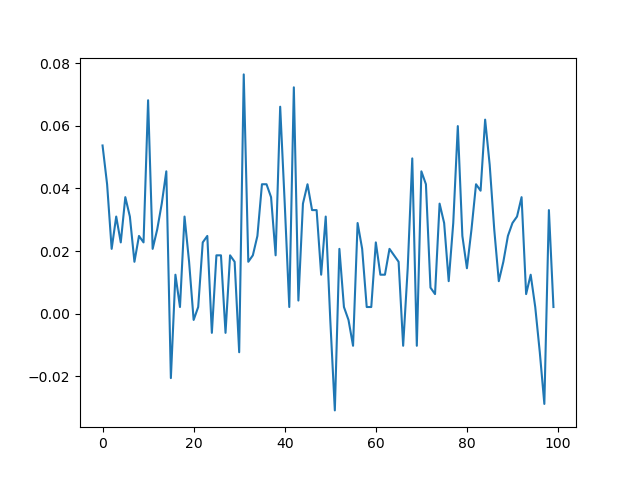

In [11]:
plt.figure()
plt.plot(dff[0:100, plot_i])

<IPython.core.display.Javascript object>


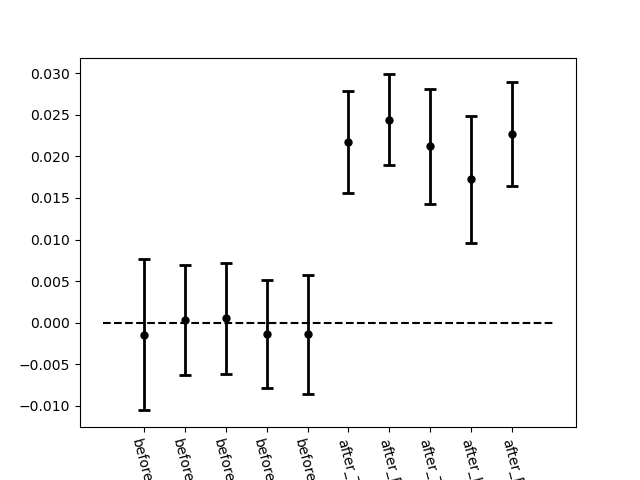

<AxesSubplot:>

In [10]:
visualize_coefficient_stats(var_strs=rs['var_names'], theta=rs['full_stats'][plot_i]['beta'], 
                            c_ints=rs['full_stats'][plot_i]['c_ints'])